# Merge main dataset w/ clean_description dataset

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/augmoura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/augmoura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/augmoura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/augmoura/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/augmoura/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv("../datasets/winemag-data-130k-v2.csv")
df_clean_description = pd.read_csv("../datasets/clean_description.csv")

In [3]:
df_clean_description = df_clean_description.drop(columns="Unnamed: 0")


In [4]:
df.index = df_clean_description.index

df = pd.concat([df, df_clean_description], axis=1)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description_2
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin...
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottle come across rather ro...


## If needed, this is how to clean the descriptions

In [5]:
def clean_text(text):
    '''
    Preprocesses text
    '''
    text = text.strip()
    
    text = text.lower()
    
    for punct in string.punctuation:
        text = text.replace(punct, "")
    
    text = "".join(char for char in text if not char.isdigit())
    
    english_sw = stopwords.words("english")
    english_sw.append('wine')
    tokenized = word_tokenize(text)
    
    text = " ".join(word for word in tokenized if word not in english_sw)
    
    lemmatizer = WordNetLemmatizer()
    tokenized = word_tokenize(text)
    lemma_verb = [lemmatizer.lemmatize(word, pos="v") for word in tokenized]
    lemma_noun = [lemmatizer.lemmatize(word, pos="n") for word in lemma_verb]
    
    text = " ".join(word for word in lemma_noun)
    
    return text

In [6]:
df["clean_description"] = df["clean_description"].apply(clean_text)
df["clean_description"].head(10)

KeyError: 'clean_description'

# Vectorizing Words

In [ ]:
cleaned_doc = df["clean_description_2"]

In [7]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 0.05)

vectorized_doc = vectorizer.fit_transform(cleaned_doc)
vectorized_doc = pd.DataFrame(
    vectorized_doc.toarray(),
    columns=vectorizer.get_feature_names_out()
)

vectorized_doc

NameError: name 'cleaned_doc' is not defined

In [13]:
vectorized_doc.columns

Index(['acidity', 'age', 'apple', 'aroma', 'balance', 'berry', 'black',
       'blackberry', 'blend', 'bottle', 'bright', 'cabernet', 'character',
       'cherry', 'chocolate', 'citrus', 'come', 'crisp', 'currant', 'dark',
       'drink', 'dry', 'feel', 'finish', 'firm', 'flavor', 'fresh', 'fruit',
       'fruity', 'full', 'give', 'good', 'green', 'herb', 'hint', 'juicy',
       'lead', 'lemon', 'light', 'make', 'nose', 'note', 'oak', 'offer',
       'open', 'palate', 'peach', 'pear', 'pepper', 'pinot', 'plum',
       'raspberry', 'red', 'rich', 'ripe', 'round', 'sauvignon', 'show',
       'smooth', 'soft', 'spice', 'spicy', 'structure', 'sweet', 'tannin',
       'taste', 'texture', 'toast', 'touch', 'vanilla', 'vineyard', 'well',
       'white', 'year'],
      dtype='object')

# Unsupervised Learning (LDA)

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, max_iter=100)

lda_model.fit(vectorized_doc)

LatentDirichletAllocation(max_iter=100, n_components=5)

In [16]:
topic_mixture = lda_model.transform(vectorized_doc)

In [17]:
type(topic_mixture)

numpy.ndarray

In [18]:
topics = pd.DataFrame(
    topic_mixture,
    columns=["topic_0", "topic_1", "topic_2", "topic_3", "topic_4"]
)

topics.head()

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.052714,0.052838,0.052996,0.054169,0.787283
1,0.809534,0.047297,0.047719,0.048135,0.047315
2,0.068387,0.068585,0.067862,0.068006,0.727160
3,0.061376,0.060103,0.060024,0.060696,0.757801
4,0.074454,0.702969,0.074211,0.074310,0.074056


In [19]:
def print_topics(lda_model, vectorizer, top_words):
    # 1. TOPIC MIXTURE OF WORDS FOR EACH TOPIC
    topic_mixture = pd.DataFrame(
        lda_model.components_,
        columns = vectorizer.get_feature_names_out()
    )
    
    # 2. FINDING THE TOP WORDS FOR EACH TOPIC
    ## Number of topics
    n_components = topic_mixture.shape[0]

    ## Top words for each topic
    for topic in range(n_components):
        print("-"*10)
        print(f"For topic {topic}, here are the top {top_words} words with weights:")

        topic_df = topic_mixture.iloc[topic]\
            .sort_values(ascending = False).head(top_words)
        
        print(round(topic_df,3))

print_topics(lda_model, vectorizer, 5)

----------
For topic 0, here are the top 5 words with weights:
fruit        4283.229
drink        3751.681
age          3450.497
acidity      3404.744
character    3303.982
Name: 0, dtype: float64
----------
For topic 1, here are the top 5 words with weights:
pinot     2981.782
taste     2878.831
flavor    2647.623
oak       2381.431
sweet     2176.576
Name: 1, dtype: float64
----------
For topic 2, here are the top 5 words with weights:
cabernet      3663.265
blackberry    3363.169
chocolate     2362.493
sauvignon     2328.141
black         2221.928
Name: 2, dtype: float64
----------
For topic 3, here are the top 5 words with weights:
aroma     5081.694
palate    4720.343
berry     4344.976
cherry    4265.471
finish    3665.728
Name: 3, dtype: float64
----------
For topic 4, here are the top 5 words with weights:
apple     4962.484
white     4366.713
citrus    4306.469
peach     3714.531
lemon     3562.652
Name: 4, dtype: float64


# Encoding Topics

In [157]:
topic5 = topic_mixture[:5]
#np.max(topic5[0,:])


#for row in range(0,5):
#    for idx, num in enumerate(topic5[row,:]):
#        if idx != np.argmax(topic5[row,:]):
#            topic5[row,idx] == int(0)
#        else:
#            topic5[row,idx] == int(1)
            
topics_encoded = topic5.copy()
#np.argmax(topic5[2,:])

array([[0.05277152, 0.05410303, 0.05300948, 0.7874489 , 0.05266706],
       [0.04596958, 0.0467972 , 0.04659229, 0.04604805, 0.81459287],
       [0.06463684, 0.06381531, 0.06403556, 0.74273137, 0.06478092],
       [0.06002681, 0.06023638, 0.06044388, 0.75794186, 0.06135107],
       [0.72222226, 0.06904208, 0.06963905, 0.06920532, 0.0698913 ]])

In [158]:
for row in range(0,5):
    np.where(topic5 == np.max(topic5[row,:]), 1, 0)
    topics_encoded = topic5
    
topics_encoded

array([[0.05277152, 0.05410303, 0.05300948, 0.7874489 , 0.05266706],
       [0.04596958, 0.0467972 , 0.04659229, 0.04604805, 0.81459287],
       [0.06463684, 0.06381531, 0.06403556, 0.74273137, 0.06478092],
       [0.06002681, 0.06023638, 0.06044388, 0.75794186, 0.06135107],
       [0.72222226, 0.06904208, 0.06963905, 0.06920532, 0.0698913 ]])

In [159]:
max_ind = np.argmax(topics_encoded, axis=1)
row_ind = np.arange(topics_encoded.shape[0])
multi_ind = np.array([row_ind, max_ind])
linear_ind = np.ravel_multi_index(multi_ind, topics_encoded.shape)
topics_encoded.reshape((-1))[linear_ind] = 1

In [160]:
topics_encoded

array([[0.05277152, 0.05410303, 0.05300948, 1.        , 0.05266706],
       [0.04596958, 0.0467972 , 0.04659229, 0.04604805, 1.        ],
       [0.06463684, 0.06381531, 0.06403556, 1.        , 0.06478092],
       [0.06002681, 0.06023638, 0.06044388, 1.        , 0.06135107],
       [1.        , 0.06904208, 0.06963905, 0.06920532, 0.0698913 ]])

In [163]:
max_ind = np.argmax(topics_encoded, axis=1)
row_ind = np.arange(topics_encoded.shape[0])
multi_ind = np.array([row_ind, max_ind])
linear_ind = np.ravel_multi_index(multi_ind, topics_encoded.shape)
topics_encoded.reshape((-1))[linear_ind] = 1

SyntaxError: invalid syntax (3270361030.py, line 2)

# Concatenating df with topics

In [20]:
df.index = topics.index

df = pd.concat([df, topics], axis=1)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description,topic_0,topic_1,topic_2,topic_3,topic_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...,0.052714,0.052838,0.052996,0.054169,0.787283
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin...,0.809534,0.047297,0.047719,0.048135,0.047315
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...,0.068387,0.068585,0.067862,0.068006,0.727160
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...,0.061376,0.060103,0.060024,0.060696,0.757801
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottle come across rather ro...,0.074454,0.702969,0.074211,0.074310,0.074056


# Imputing Values to Price

In [20]:
from sklearn.impute import KNNImputer

X = df[["points", "price"]]

imputer = KNNImputer(n_neighbors=2)
df_copy[["points", "price"]] = imputer.fit_transform(X)

NameError: name 'df_copy' is not defined

In [27]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description,topic_0,topic_1,topic_2,topic_3,topic_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,14.5,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...,0.052714,0.052838,0.052996,0.054169,0.787283
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin...,0.809534,0.047297,0.047719,0.048135,0.047315
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...,0.068387,0.068585,0.067862,0.068006,0.727160
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...,0.061376,0.060103,0.060024,0.060696,0.757801
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottle come across rather ro...,0.074454,0.702969,0.074211,0.074310,0.074056


# Exploring Columns

## Price

<AxesSubplot:>

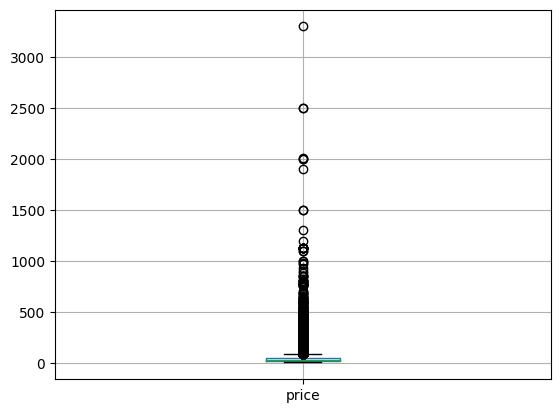

In [31]:
import matplotlib.pyplot as plt

df_copy[["price"]].boxplot()

In [33]:
df_copy[df_copy["price"] > 1400]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description,topic_0,topic_1,topic_2,topic_3,topic_4
1558,1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98.0,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,massive margaux pack tannin ripe fruit caberne...,0.447083,0.047192,0.411419,0.047197,0.047109
15840,15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96.0,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus,velvet glove iron fist smooth surface ripe fru...,0.801101,0.049029,0.051985,0.049155,0.048731
65352,65352,France,This extravagantly perfumed wine has great jui...,NaN,97.0,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus,extravagantly perfume great juicy ripe fruit t...,0.801996,0.049486,0.049428,0.049433,0.049657
80290,80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88.0,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,ripe show plenty blackberry fruit balance well...,0.823782,0.043582,0.044949,0.043828,0.043859
98380,98380,France,"A superb wine from a great year, this is power...",NaN,96.0,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,superb great year powerful structure great aci...,0.709939,0.153276,0.045904,0.045632,0.045249
111753,111753,France,"Almost black in color, this stunning wine is g...",NaN,100.0,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,almost black color stun gorgeous rich dense gr...,0.066680,0.065484,0.736817,0.065940,0.065078
111755,111755,France,This is the finest Cheval Blanc for many years...,NaN,100.0,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,finest cheval blanc many year quite simply mag...,0.568082,0.049523,0.283836,0.049302,0.049257
113564,113564,France,"A wonderfully complete wine, with all the elem...",NaN,96.0,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,wonderfully complete element place ripe powerf...,0.813484,0.046653,0.047220,0.046575,0.046067
120391,120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91.0,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,nose singlevineyard strong often overlook appe...,0.056308,0.056557,0.056495,0.056991,0.773648


## Variety

In [38]:
len(df_copy["variety"].unique())

708

In [39]:
df_copy["variety"].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

# Predicting with NearestNeighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_validate

In [ ]:
cleaned_doc = df["clean_description_2"]

vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 0.01)

vectorized_doc = vectorizer.fit_transform(cleaned_doc)
vectorized_doc = pd.DataFrame(
    vectorized_doc.toarray(),
    columns=vectorizer.get_feature_names_out()
)

vectorized_doc

In [ ]:
vectorizer_matrix = vectorizer.fit_transform(cleaned_doc)
vectorizer_matrix.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X = vectorizer_matrix
n_neigh = NearestNeighbors(n_neighbors=5)
n_neigh.fit(X)

answer = str(input("Describe in a few words the type of wine you're looking for: "))

In [ ]:
english_sw = stopwords.words("english") + ["wine", "wines", "drink", "flavor", "age", "give", "vineyard", "vineyards", "year", "years"]

answer = clean_text(answer) #Check this function above in this notebook

answer_split = answer.split()
answer_transformed = vectorizer.transform(answer_split)
n_neigh.kneighbors(answer_transformed, 5, return_distance=False) #Currently this is resulting in the closest neighbors to each word in answer_transformed

# Predicting similarity with Doc2Vec

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
#from tqdm import tqdm

In [10]:
def tokenize_text(text):
    '''
    Tokenizes text in the main dataframe
    '''
    # Tokenize 
    tokenized = word_tokenize(text)
    
    return tokenized

In [11]:
tokenized_text = df["clean_description_2"].apply(lambda x: word_tokenize(str(x)))
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_text)] # Testing w/ first 100 rows from df

KeyboardInterrupt: 

In [24]:
answer_doc2vec = str(input("Describe in a few words the type of wine you're looking for: "))

Describe in a few words the type of wine you're looking for: i like white and dry wines


In [25]:
clean_answer = clean_text(answer_doc2vec)

In [26]:
%%time
test_doc = word_tokenize(clean_answer)
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)
test_doc_vector = model.infer_vector(test_doc)

model.dv.most_similar(positive = [test_doc_vector])

[(127504, 0.8388680815696716),
 (6880, 0.8270225524902344),
 (20894, 0.825497567653656),
 (72594, 0.8246555924415588),
 (21875, 0.8192472457885742),
 (70316, 0.8182402849197388),
 (114873, 0.8164960741996765),
 (96019, 0.8014243245124817),
 (114586, 0.7993941307067871),
 (55909, 0.7951002717018127)]

In [28]:
pickle.dump(model, open('model_v1.pkl','wb'))

# Using the imported model

In [12]:
model_imported = pickle.load(open('model_v1.pkl','rb'))

In [88]:
answer_doc2vec_v1 = str(input("Describe in a few words the type of wine you're looking for: "))

Describe in a few words the type of wine you're looking for: tempranillo with apricot flavor


In [104]:
clean_answer = word_tokenize(clean_text("I like full-bodied, red wine, blackberry flavour, tempranillo grape"))
test_doc_vector_v1 = model_imported.infer_vector(clean_answer)

In [105]:
clean_answer

['like', 'fullbodied', 'red', 'blackberry', 'flavour', 'tempranillo', 'grape']

In [107]:
test_doc_vector_v1

array([-1.8759357 ,  0.12467436,  0.9487271 , -0.28245983,  2.255683  ,
        1.9959582 ,  1.390618  ,  0.87371   , -0.21089435,  0.46532086,
       -0.48152164, -0.58406085,  2.4705503 ,  1.0751702 , -0.46933797,
        0.9899128 , -0.9153807 ,  1.2097777 , -0.29973528, -1.1147045 ],
      dtype=float32)

In [108]:
idx = []

for i, row in enumerate(model_imported.dv.most_similar(positive = [test_doc_vector_v1])[:5]):
    idx.append(row[0])

idx

[45913, 124998, 39505, 45572, 65674]

In [109]:
df.iloc[idx]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description_2
45913,45913,Chile,"This blend of Syrah, Carmenère and Malbec is better than EW's varietal wines made from those same grapes, which proves that sometimes blends are best. It offers plum, currant and floral aromas before a fairly rich palate. Chocolaty blackberry and burnt notes end with a chocolate-driven finish.",NaN,89,16.0,Elqui Valley,NaN,NaN,Michael Schachner,@wineschach,Elqui Wines 2013 Red (Elqui Valley),Red Blend,Elqui Wines,blend syrah carmenère malbec better ew varietal make grape prove sometimes blend best offer plum currant floral aroma fairly rich palate chocolaty blackberry burn note end chocolatedriven finish
124998,124998,Spain,"Layered aromas of blackberry, cassis, leather and dried cheese are inviting. In the mouth, this Garnacha from vines more than 100-years-old is jammy and friendly. Candied almost syrupy flavors of blackberry and black cherry finish dense and chocolaty, with modest acidity. Drink through 2017.",Particular Viñas Centenarias,89,30.0,Northern Spain,Cariñena,NaN,Michael Schachner,@wineschach,Bodegas San Valero 2011 Particular Viñas Centenarias Garnacha (Cariñena),Garnacha,Bodegas San Valero,layer aroma blackberry cassis leather dry cheese invite mouth garnacha vine yearsold jammy friendly candy almost syrupy flavor blackberry black cherry finish dense chocolaty modest acidity
39505,39505,US,"Petit Verdot is not an easy grape; here it turns volatile, the grapes pruney, and the finish tannic and short.",Proprietor's Limited Release,82,20.0,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,@paulgwine,Mount Baker 2007 Proprietor's Limited Release Petit Verdot (Yakima Valley),Petit Verdot,Mount Baker,petit verdot easy grape turn volatile grape pruney finish tannic short
45572,45572,Spain,"This Tempranillo-Cabernet Sauvignon blend smells like mushy strawberries, loamy earth and animal fur. It's jammy and not well balanced, with gummy, candied raspberry and plum flavors. Flat and earthy on the finish.",Gran Reserva,81,10.0,Levante,Valencia,NaN,Michael Schachner,@wineschach,Torre Oria 2009 Gran Reserva Tempranillo-Cabernet Sauvignon (Valencia),Tempranillo-Cabernet Sauvignon,Torre Oria,tempranillocabernet sauvignon blend smell like mushy strawberry loamy earth animal fur jammy well balance gummy candy raspberry plum flavor flat earthy finish
65674,65674,Chile,"Earthy, loamy, baked berry aromas shout out “hot vintage,” while this is soft and chunky on the palate. Flavors of baked plum and earthy raspberry are heavy and finish with notes of molasses and leather. Drink now to get the most out of this weighty Pinot.",Grand Reserve,87,20.0,Casablanca Valley,NaN,NaN,Michael Schachner,@wineschach,Quintay 2012 Grand Reserve Pinot Noir (Casablanca Valley),Pinot Noir,Quintay,earthy loamy bake berry aroma shout “ hot vintage ” soft chunky palate flavor bake plum earthy raspberry heavy finish note molasses leather get weighty pinot


# POS Tagging

In [67]:
common_words = pd.read_csv("common_words_df.csv")
common_words.head()

,Unnamed: 0,Terms,Freq
0,0,flavor,63355
1,1,fruit,58786
2,2,aroma,41019
3,3,finish,40453
4,4,palate,38292


In [68]:
common_words["POS"] = nltk.pos_tag(commom_words["Terms"])

In [69]:
common_words["POS"].head()

0    (flavor, NN)
1     (fruit, NN)
2     (aroma, NN)
3    (finish, JJ)
4    (palate, NN)
Name: POS, dtype: object

In [81]:
common_words["POS"].str[1][:]

0         NN
1         NN
2         NN
3         JJ
4         NN
        ... 
35287    VBP
35288     JJ
35289     NN
35290    VBD
35291    VBD
Name: POS, Length: 35292, dtype: object

In [82]:
common_words["POS"] = common_words["POS"].str[1][:]

In [85]:
common_words = common_words.drop(columns="Unnamed: 0")

In [87]:
common_words.to_csv("../working_files/common_words.csv")

## Filtering relevant POS tags

In [6]:
cw = pd.read_csv("../working_files/common_words.csv")

In [7]:
cw.head()

,Unnamed: 0,Terms,Freq,POS
0,0,flavor,63355,NN
1,1,fruit,58786,NN
2,2,aroma,41019,NN
3,3,finish,40453,JJ
4,4,palate,38292,NN


In [8]:
tags = ["VBD", "JJ", "IN", "JJS"] # No: CC, CD, DT, EX, FW,

cw[cw["POS"]=="JJR"][5:50] # .isin(tags)

,Unnamed: 0,Terms,Freq,POS
1516,1516,higher,219,JJR
1655,1655,older,190,JJR
1704,1704,temper,181,JJR
1730,1730,wildflower,177,JJR
1831,1831,greater,162,JJR
1850,1850,oyster,158,JJR
1884,1884,earthier,153,JJR
1986,1986,lower,140,JJR
2007,2007,meunier,136,JJR
2077,2077,bigger,127,JJR


In [9]:
df.iloc[128920]

Unnamed: 0                                                          128920
country                                                             France
description              This supple yet mouthfilling wine boasts inten...
designation                                                            NaN
points                                                                  89
price                                                                 35.0
province                                                      Rhône Valley
region_1                                               Châteauneuf-du-Pape
region_2                                                               NaN
taster_name                                                 Joe Czerwinski
taster_twitter_handle                                               @JoeCz
title                    Les Trois Couronnes 2011 Red (Châteauneuf-du-P...
variety                                              Rhône-style Red Blend
winery                   

In [18]:
pd.options.display.max_colwidth = 450

df[["description"]][df["clean_description_2"].str.contains(" blood ")][0:49]

,description
127,"Attractive mid-gold color with intense aromas of ripe citrus and stone fruit, strong minerality and hints of spice. Racy with crisp acidity, juicy, rich and smooth texture with lots of concentrated, bright flavors of blood orange, peach, apricot, mango and spice. Strong minerality follows through to a long, precise, juicy finish."
1082,"Lighter in color, this wine is aromatic and expressive, with notes of fire pit, blood, black olive tapenade, sea salt, black pepper, cured meat, nori, crushed flowers and umami. The palate brings soft, lithe, focused notes of earth and savory flavors that shimmer on the salty finish. It's all about delicacy but the aroma and flavor expression is compelling. Give it some time in the cellar or decant."
1138,"This informal rosato offers delicate aromas and flavors of wild red berry and blood orange. It's rather lean and diluted, with bracing acidity."
1363,"“Sangue Blu,” which translates to “blue blood,” offers sun-drenched aromas of ripe fruit and rum cake that are backed by tobacco and sweet Indian spice notes. The mouthfeel is textured, gritty and rich."
1424,"Sourced principally from Klipsun, with smaller amounts from Champoux and Seven Hills, this tight, dark, richly-flavored wine has impeccable credentials. Black fruits, espresso and citrus—notably blood orange—mingle seamlessly, though it takes some hours to open up. The Red Mountain fruit contributes characteristic notes of iron ore and underlying minerality."
2202,"Produced by the Terravant facility in Buellton, this shows lots of smoked pork and bacon fat against a boysenberry-fruit frame on the nose. Flavors are quite sanguine, with iron and blood elements, as well as more smoke and some dried herbs."
2352,"Enticing and idiosyncratic on the nose, this Merlot offers notes of rose petal, smoke, blood orange and caraway seed. The palate is medium bodied and the 13% alcohol gives it a sense of finesse. Fine but firm tannins frame the cherry fruit, and it finishes with hints of maduro and rose."
2989,"This sensational effort was fermented and briefly aged in neutral oak. The striking package sets it apart from all other Rex Hill wines, and the rich, complex flavors add to the impression that this is something truly special. Red berries, blood orange, a touch of Grand Marnier, impressive body and spicy highlights all combine in a darn near irresistible rosé with the power to be a four season wine."
3029,"This is classically proportioned in the warm-climate style. It provides a textbook example of the variety's inky black and purple color, rich, thick tannins and elaborate flavors. These flavors include profoundly ripe summer blackberry and mulberry, smoky, umami-rich bacon and sweet sandalwood. Full-bodied and dry, this is a wine to warm the blood on cold winter nights."
3408,Oily aromas of orange peel are inoffensive. A shearing palate offers little textural pleasure or complexity. Flavors of lemon and blood orange finish with a sour note of underripe pineapple.


In [11]:
fruit_flavor = "apple|pineapple|mango|pear|peach|fruity|fruit|tangerine"
oak_flavor = "oak|oaky|wood|vanilla|toast"
sweet_flavor = "chocolate|caramel"
coffee_flavor = "espresso|mocha"
spice_flavor = "spice|spicy|peppery"

flavors = fruit_flavor, oak_flavor

In [12]:
import re
import numpy as np

In [13]:
df["description"][0:49].apply(lambda x: re.findall(fruit_flavor, x))

0               [fruit, apple]
1              [fruity, fruit]
2                  [pineapple]
3               [apple, mango]
4                           []
5                      [fruit]
6                           []
7                           []
8              [peach, fruity]
9         [apple, pear, fruit]
10                          []
11                          []
12                          []
13                          []
14    [apple, pear, pineapple]
15                     [apple]
16                          []
17                     [fruit]
18                     [fruit]
19                     [fruit]
20                          []
21                          []
22              [fruit, peach]
23                          []
24                          []
25                          []
26              [fruit, apple]
27                          []
28                          []
29               [fruit, pear]
30                     [fruit]
31                     [fruit]
32      

In [30]:
flavors = pd.DataFrame(np.where(df["description"][0:999].str.contains(fruit_flavor), "fruit_flavor",
                        np.where(df["description"][0:999].str.contains(oak_flavor), "oak_flavor",
                        np.where(df["description"][0:999].str.contains(sweet_flavor), "sweet_flavor",
                        np.where(df["description"][0:999].str.contains(coffee_flavor), "coffee_flavor",
                        np.where(df["description"][0:999].str.contains(spice_flavor), "spice_flavor", "Not identified")
                       )))))
flavors

,0
0,fruit_flavor
1,fruit_flavor
2,fruit_flavor
3,fruit_flavor
4,Not identified
...,...
994,fruit_flavor
995,fruit_flavor
996,spice_flavor
997,fruit_flavor


In [51]:
flavors[flavors[0]=="coffee_flavor"]

,0
159,coffee_flavor
190,coffee_flavor
252,coffee_flavor
348,coffee_flavor
404,coffee_flavor
549,coffee_flavor
618,coffee_flavor
683,coffee_flavor
721,coffee_flavor
765,coffee_flavor


In [95]:
df["title"][df["description"].str.contains("A wine with light tannins and juic")]

86584    De Mour 2009 Duc de Rochebois  (Bordeaux)
Name: title, dtype: object

In [56]:
df.iloc[159]

Unnamed: 0                                                                                                                                                                                                                                                                   159
country                                                                                                                                                                                                                                                                    Italy
description              Intense aromas of ripe red berry, menthol, espresso and star anise lead the nose. The concentrated palate offers cranberry, dried Morello cherry, sage and licorice alongside close-grained tannins that grip the finish. Drink from 2018 through 2025.
designation                                                                                                                                                                          

In [94]:
df[df["description"].str.contains("This offers aromas of dill, wet leaves, h")]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description_2
25528,25528,Italy,"This offers aromas of dill, wet leaves, hay, pickled beets, roasted coffee bean and spearmint. The palate lacks fruit richness, delivering instead espresso and vanilla-sweetened oak. Astringent tannins generate a tongue-drying finish.",Le Coste di Monforte,86,80.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Parusso 2010 Le Coste di Monforte (Barolo),Nebbiolo,Parusso,offer aroma dill wet leave hay pickle beet roast coffee bean spearmint palate lack fruit richness deliver instead espresso vanillasweetened oak astringent tannin generate tonguedrying finish


In [14]:
df["title"].value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                         11
Korbel NV Brut Sparkling (California)                                           9
Segura Viudas NV Extra Dry Sparkling (Cava)                                     8
Ruinart NV Brut Rosé  (Champagne)                                               7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                         7
                                                                               ..
Cave de Tain 2009 Gambert de Loche  (Hermitage)                                 1
Les Vins de Vienne 2009 Les Barcillants  (Cornas)                               1
Jean-Luc Colombo 2009 La Louvée  (Cornas)                                       1
Jean-Luc Baldès 2009 Clos Triguedina The New Black Wine Malbec (Cahors)         1
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)     1
Name: title, Length: 118840, dtype: int64